<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

# Preamble:

# Importing libraries and reading in data

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv('LGBT_Survey_ViolenceAndHarassment.csv')

## Data's in a tough format, will need preprocessing

In [4]:
df.head(10)

,CountryCode,subset,question_code,question_label,answer,percentage,notes
0,Austria,Lesbian,e1,Do you avoid holding hands in public with a sa...,Yes,33,NaN
1,Austria,Lesbian,e1,Do you avoid holding hands in public with a sa...,No,53,NaN
2,Austria,Lesbian,e1,Do you avoid holding hands in public with a sa...,I do not have a same-sex partner,12,NaN
3,Austria,Lesbian,e1,Do you avoid holding hands in public with a sa...,Don`t know,2,[0]
4,Austria,Gay,e1,Do you avoid holding hands in public with a sa...,Yes,51,NaN
5,Austria,Gay,e1,Do you avoid holding hands in public with a sa...,No,25,NaN
6,Austria,Gay,e1,Do you avoid holding hands in public with a sa...,I do not have a same-sex partner,22,NaN
7,Austria,Gay,e1,Do you avoid holding hands in public with a sa...,Don`t know,2,NaN
8,Austria,Bisexual women,e1,Do you avoid holding hands in public with a sa...,Yes,18,NaN
9,Austria,Bisexual women,e1,Do you avoid holding hands in public with a sa...,No,40,NaN


## Taking a look at the questions

In [6]:
df.question_label.value_counts()

LAST incident of harassment in the past 12 months - Where did it happen?                                                                                                                                                                                     2175
MOST SERIOUS incident of harassment - Where did it happen?                                                                                                                                                                                                   2175
The MOST SERIOUS physical / sexual attack or threat of violence - Where did it happen?                                                                                                                                                                       2016
Where did the last incident of physical / sexual attack or threat of violence happen?                                                                                                                                             

## Looking at nulls

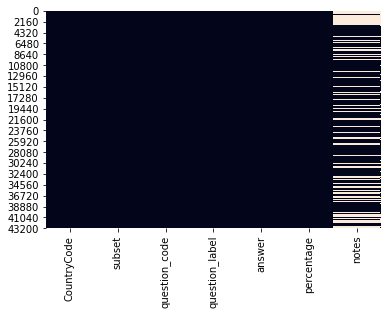

In [9]:
sns.heatmap(df.isnull(), cbar=False)

In [8]:
df.shape

(45355, 7)

In [10]:
report_df = df[df['question_label'] =="MOST SERIOUS physical / sexual attack or threat of violence - Did you or anyone else report it to the police?"]

report_df

,CountryCode,subset,question_code,question_label,answer,percentage,notes
15267,Austria,Lesbian,fa2_11,MOST SERIOUS physical / sexual attack or threa...,Yes,18,NaN
15268,Austria,Lesbian,fa2_11,MOST SERIOUS physical / sexual attack or threa...,No,81,NaN
15269,Austria,Lesbian,fa2_11,MOST SERIOUS physical / sexual attack or threa...,Don`t know,1,[0]
15270,Austria,Gay,fa2_11,MOST SERIOUS physical / sexual attack or threa...,Yes,23,NaN
15271,Austria,Gay,fa2_11,MOST SERIOUS physical / sexual attack or threa...,No,77,NaN
...,...,...,...,...,...,...,...
15694,Average,Bisexual men,fa2_11,MOST SERIOUS physical / sexual attack or threa...,No,74,NaN
15695,Average,Bisexual men,fa2_11,MOST SERIOUS physical / sexual attack or threa...,Don`t know,2,NaN
15696,Average,Transgender,fa2_11,MOST SERIOUS physical / sexual attack or threa...,Yes,24,NaN
15697,Average,Transgender,fa2_11,MOST SERIOUS physical / sexual attack or threa...,No,74,NaN


In [11]:
report_df.answer.value_counts()

Don`t know    144
No            144
Yes           144
Name: answer, dtype: int64

In [12]:
zeros_reports = report_df[report_df['percentage'] == '0']

zeros_reports.tail(20)

,CountryCode,subset,question_code,question_label,answer,percentage,notes
15509,Lithuania,Lesbian,fa2_11,MOST SERIOUS physical / sexual attack or threa...,Don`t know,0,[0]
15518,Lithuania,Bisexual men,fa2_11,MOST SERIOUS physical / sexual attack or threa...,Don`t know,0,[0]
15521,Lithuania,Transgender,fa2_11,MOST SERIOUS physical / sexual attack or threa...,Don`t know,0,[0]
15527,Luxembourg,Gay,fa2_11,MOST SERIOUS physical / sexual attack or threa...,Don`t know,0,[0]
15551,Malta,Lesbian,fa2_11,MOST SERIOUS physical / sexual attack or threa...,Don`t know,0,[0]
15554,Malta,Gay,fa2_11,MOST SERIOUS physical / sexual attack or threa...,Don`t know,0,[0]
15566,Netherlands,Lesbian,fa2_11,MOST SERIOUS physical / sexual attack or threa...,Don`t know,0,[0]
15575,Netherlands,Bisexual men,fa2_11,MOST SERIOUS physical / sexual attack or threa...,Don`t know,0,[0]
15578,Netherlands,Transgender,fa2_11,MOST SERIOUS physical / sexual attack or threa...,Don`t know,0,[0]
15593,Poland,Transgender,fa2_11,MOST SERIOUS physical / sexual attack or threa...,Don`t know,0,[0]


In [13]:
len(zeros_reports)

41

In [14]:
why_report = df[df['question_label'] == 'MOST SERIOUS physical / sexual attack or threat of violence - Why did you not report it to the police?']

why_report.head(20)

,CountryCode,subset,question_code,question_label,answer,percentage,notes
15699,Austria,Lesbian,fa2_12,MOST SERIOUS physical / sexual attack or threa...,Dealt with it myself/involved a friend/family ...,30,NaN
15700,Austria,Lesbian,fa2_12,MOST SERIOUS physical / sexual attack or threa...,Too minor / not serious enough / never occurre...,49,NaN
15701,Austria,Lesbian,fa2_12,MOST SERIOUS physical / sexual attack or threa...,Did not think they would do anything,24,NaN
15702,Austria,Lesbian,fa2_12,MOST SERIOUS physical / sexual attack or threa...,Did not think they could do anything,17,[0]
15703,Austria,Lesbian,fa2_12,MOST SERIOUS physical / sexual attack or threa...,"Fear of offender, fear of reprisal",14,[0]
15704,Austria,Lesbian,fa2_12,MOST SERIOUS physical / sexual attack or threa...,"Shame, embarrassment, didn`t want anyone to know",18,[0]
15705,Austria,Lesbian,fa2_12,MOST SERIOUS physical / sexual attack or threa...,Too emotionally upset to contact the police,16,[0]
15706,Austria,Lesbian,fa2_12,MOST SERIOUS physical / sexual attack or threa...,Thought it was my fault,6,[0]
15707,Austria,Lesbian,fa2_12,MOST SERIOUS physical / sexual attack or threa...,Didn`t want the offender arrested or to get in...,4,[0]
15708,Austria,Lesbian,fa2_12,MOST SERIOUS physical / sexual attack or threa...,Would not be believed,10,[0]


In [15]:
why_report.answer.value_counts()

Shame, embarrassment, didn`t want anyone to know                          142
Did not think they would do anything                                      141
Too emotionally upset to contact the police                               141
Fear of a homophobic and/or transphobic reaction from the police          141
Dealt with it myself/involved a friend/family matter                      141
Did not think they could do anything                                      141
Fear of offender, fear of reprisal                                        139
Too minor / not serious enough / never occurred to me                     138
Would not be believed                                                     137
Other reason                                                              131
Thought it was my fault                                                   129
Didn`t want the offender arrested or to get in trouble with the police    127
Went someplace else for help                                    

In [16]:
df['percentage'] = df['percentage'].replace(":", 0)

## Combinging question code and answer

In [17]:
df['qa'] = df['question_code'] + "_"+df["answer"]

df.head(10)

,CountryCode,subset,question_code,question_label,answer,percentage,notes,qa
0,Austria,Lesbian,e1,Do you avoid holding hands in public with a sa...,Yes,33,NaN,e1_Yes
1,Austria,Lesbian,e1,Do you avoid holding hands in public with a sa...,No,53,NaN,e1_No
2,Austria,Lesbian,e1,Do you avoid holding hands in public with a sa...,I do not have a same-sex partner,12,NaN,e1_I do not have a same-sex partner
3,Austria,Lesbian,e1,Do you avoid holding hands in public with a sa...,Don`t know,2,[0],e1_Don`t know
4,Austria,Gay,e1,Do you avoid holding hands in public with a sa...,Yes,51,NaN,e1_Yes
5,Austria,Gay,e1,Do you avoid holding hands in public with a sa...,No,25,NaN,e1_No
6,Austria,Gay,e1,Do you avoid holding hands in public with a sa...,I do not have a same-sex partner,22,NaN,e1_I do not have a same-sex partner
7,Austria,Gay,e1,Do you avoid holding hands in public with a sa...,Don`t know,2,NaN,e1_Don`t know
8,Austria,Bisexual women,e1,Do you avoid holding hands in public with a sa...,Yes,18,NaN,e1_Yes
9,Austria,Bisexual women,e1,Do you avoid holding hands in public with a sa...,No,40,NaN,e1_No


## Dropping the notes column, difficult for analysis

In [18]:
df = df.drop('notes', axis=1)

In [19]:
df.head()

,CountryCode,subset,question_code,question_label,answer,percentage,qa
0,Austria,Lesbian,e1,Do you avoid holding hands in public with a sa...,Yes,33,e1_Yes
1,Austria,Lesbian,e1,Do you avoid holding hands in public with a sa...,No,53,e1_No
2,Austria,Lesbian,e1,Do you avoid holding hands in public with a sa...,I do not have a same-sex partner,12,e1_I do not have a same-sex partner
3,Austria,Lesbian,e1,Do you avoid holding hands in public with a sa...,Don`t know,2,e1_Don`t know
4,Austria,Gay,e1,Do you avoid holding hands in public with a sa...,Yes,51,e1_Yes


# Encoding: question and answer

In [20]:
dum = pd.get_dummies(df['qa'], drop_first=True)

dum_col = dum.columns

df = pd.concat([df, dum], axis=1)

df.head(10)

,CountryCode,subset,question_code,question_label,answer,percentage,qa,e1_Don`t know,e1_I do not have a same-sex partner,e1_No,...,fb2_8_Both male and female,fb2_8_Don`t know,fb2_8_Female,fb2_8_Male,fb2_9_Bisexual,fb2_9_Don`t know,fb2_9_Gay,fb2_9_Heterosexual/Straight,fb2_9_Lesbian,fb2_9_Mixed sexual orientation
0,Austria,Lesbian,e1,Do you avoid holding hands in public with a sa...,Yes,33,e1_Yes,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Austria,Lesbian,e1,Do you avoid holding hands in public with a sa...,No,53,e1_No,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Austria,Lesbian,e1,Do you avoid holding hands in public with a sa...,I do not have a same-sex partner,12,e1_I do not have a same-sex partner,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Austria,Lesbian,e1,Do you avoid holding hands in public with a sa...,Don`t know,2,e1_Don`t know,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Austria,Gay,e1,Do you avoid holding hands in public with a sa...,Yes,51,e1_Yes,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Austria,Gay,e1,Do you avoid holding hands in public with a sa...,No,25,e1_No,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,Austria,Gay,e1,Do you avoid holding hands in public with a sa...,I do not have a same-sex partner,22,e1_I do not have a same-sex partner,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,Austria,Gay,e1,Do you avoid holding hands in public with a sa...,Don`t know,2,e1_Don`t know,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Austria,Bisexual women,e1,Do you avoid holding hands in public with a sa...,Yes,18,e1_Yes,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Austria,Bisexual women,e1,Do you avoid holding hands in public with a sa...,No,40,e1_No,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [21]:
df3 = df.apply(lambda x: np.where(x == 1, df['percentage'], x))

df3.tail(20)

,CountryCode,subset,question_code,question_label,answer,percentage,qa,e1_Don`t know,e1_I do not have a same-sex partner,e1_No,...,fb2_8_Both male and female,fb2_8_Don`t know,fb2_8_Female,fb2_8_Male,fb2_9_Bisexual,fb2_9_Don`t know,fb2_9_Gay,fb2_9_Heterosexual/Straight,fb2_9_Lesbian,fb2_9_Mixed sexual orientation
45335,Average,Gay,fb2_9,MOST SERIOUS incident of harassment - Do you t...,Mixed sexual orientation,5,fb2_9_Mixed sexual orientation,0,0,0,...,0,0,0,0,0,0,0,0,0,5
45336,Average,Gay,fb2_9,MOST SERIOUS incident of harassment - Do you t...,Don`t know,26,fb2_9_Don`t know,0,0,0,...,0,0,0,0,0,26,0,0,0,0
45337,Average,Bisexual women,fb2_9,MOST SERIOUS incident of harassment - Do you t...,Heterosexual/Straight,69,fb2_9_Heterosexual/Straight,0,0,0,...,0,0,0,0,0,0,0,69,0,0
45338,Average,Bisexual women,fb2_9,MOST SERIOUS incident of harassment - Do you t...,Lesbian,1,fb2_9_Lesbian,0,0,0,...,0,0,0,0,0,0,0,0,1,0
45339,Average,Bisexual women,fb2_9,MOST SERIOUS incident of harassment - Do you t...,Gay,0,fb2_9_Gay,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45340,Average,Bisexual women,fb2_9,MOST SERIOUS incident of harassment - Do you t...,Bisexual,1,fb2_9_Bisexual,0,0,0,...,0,0,0,0,1,0,0,0,0,0
45341,Average,Bisexual women,fb2_9,MOST SERIOUS incident of harassment - Do you t...,Mixed sexual orientation,4,fb2_9_Mixed sexual orientation,0,0,0,...,0,0,0,0,0,0,0,0,0,4
45342,Average,Bisexual women,fb2_9,MOST SERIOUS incident of harassment - Do you t...,Don`t know,25,fb2_9_Don`t know,0,0,0,...,0,0,0,0,0,25,0,0,0,0
45343,Average,Bisexual men,fb2_9,MOST SERIOUS incident of harassment - Do you t...,Heterosexual/Straight,57,fb2_9_Heterosexual/Straight,0,0,0,...,0,0,0,0,0,0,0,57,0,0
45344,Average,Bisexual men,fb2_9,MOST SERIOUS incident of harassment - Do you t...,Lesbian,0,fb2_9_Lesbian,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Dropping constituent variables making up or made redundant by QA's encoded variables

In [22]:
df3= df3.drop(['question_code', 'question_label', 'answer', 'percentage', 'qa'], axis=1)

df3.head()

,CountryCode,subset,e1_Don`t know,e1_I do not have a same-sex partner,e1_No,e1_Yes,e2_Don`t know,e2_No,e2_Yes,"e3_A cafe, restaurant, pub, club",...,fb2_8_Both male and female,fb2_8_Don`t know,fb2_8_Female,fb2_8_Male,fb2_9_Bisexual,fb2_9_Don`t know,fb2_9_Gay,fb2_9_Heterosexual/Straight,fb2_9_Lesbian,fb2_9_Mixed sexual orientation
0,Austria,Lesbian,0,0,0,33,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Austria,Lesbian,0,0,53,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Austria,Lesbian,0,12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Austria,Lesbian,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Austria,Gay,0,0,0,51,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## List of question codes and answers

In [23]:
dum_col = list(dum_col)

dum_col

['e1_Don`t know',
 'e1_I do not have a same-sex partner',
 'e1_No',
 'e1_Yes',
 'e2_Don`t know',
 'e2_No',
 'e2_Yes',
 'e3_A cafe, restaurant, pub, club',
 'e3_A park',
 'e3_A sports club',
 'e3_A street, square, car parking lot or other public place',
 'e3_My home',
 'e3_Other',
 'e3_Public premises or buildings',
 'e3_Public transport',
 'e3_School',
 'e3_Workplace',
 'f1_a_No',
 'f1_a_Yes',
 'f1_b_No',
 'f1_b_Yes',
 'fa1_10_At an LGBT specific venue (e.g. club, bar) or event (e.g. pride)',
 'fa1_10_At my home',
 'fa1_10_At school, university',
 'fa1_10_At the workplace',
 'fa1_10_Elsewhere indoors',
 'fa1_10_Elsewhere outdoors',
 'fa1_10_In a cafe, restaurant, pub, club',
 'fa1_10_In a car',
 'fa1_10_In a park, forest',
 'fa1_10_In a sports club',
 'fa1_10_In a street, square, car parking lot or other public place',
 'fa1_10_In public transport',
 'fa1_10_In some other residential building, apartment',
 'fa1_10_Other',
 'fa1_11_Don`t know',
 'fa1_11_No',
 'fa1_11_Yes',
 'fa1_12_Deal

# Grouping together country and demographic subset, summing percentages of QAnswers

In [24]:
df4 = df3.groupby(['CountryCode', 'subset'])[dum_col].apply(lambda x : x.astype(int).sum()).reset_index()
df4.head()

,CountryCode,subset,e1_Don`t know,e1_I do not have a same-sex partner,e1_No,e1_Yes,e2_Don`t know,e2_No,e2_Yes,"e3_A cafe, restaurant, pub, club",...,fb2_8_Both male and female,fb2_8_Don`t know,fb2_8_Female,fb2_8_Male,fb2_9_Bisexual,fb2_9_Don`t know,fb2_9_Gay,fb2_9_Heterosexual/Straight,fb2_9_Lesbian,fb2_9_Mixed sexual orientation
0,Austria,Bisexual men,1,49,11,39,5,65,30,68,...,16,0,7,76,2,25,8,55,0,9
1,Austria,Bisexual women,2,39,40,18,8,65,27,34,...,22,2,18,59,2,36,0,57,1,4
2,Austria,Gay,2,22,25,51,4,56,40,48,...,21,3,5,72,1,27,4,62,0,6
3,Austria,Lesbian,2,12,53,33,5,51,44,39,...,23,3,10,64,0,21,0,73,1,4
4,Austria,Transgender,2,40,32,25,19,38,43,38,...,30,4,8,58,2,29,0,64,0,5


## Renaming target variable for ease of use

In [26]:
df4 =df4.rename(columns={'fa2_11_No': 'Reported'})

df4.head()

,CountryCode,subset,e1_Don`t know,e1_I do not have a same-sex partner,e1_No,e1_Yes,e2_Don`t know,e2_No,e2_Yes,"e3_A cafe, restaurant, pub, club",...,fb2_8_Both male and female,fb2_8_Don`t know,fb2_8_Female,fb2_8_Male,fb2_9_Bisexual,fb2_9_Don`t know,fb2_9_Gay,fb2_9_Heterosexual/Straight,fb2_9_Lesbian,fb2_9_Mixed sexual orientation
0,Austria,Bisexual men,1,49,11,39,5,65,30,68,...,16,0,7,76,2,25,8,55,0,9
1,Austria,Bisexual women,2,39,40,18,8,65,27,34,...,22,2,18,59,2,36,0,57,1,4
2,Austria,Gay,2,22,25,51,4,56,40,48,...,21,3,5,72,1,27,4,62,0,6
3,Austria,Lesbian,2,12,53,33,5,51,44,39,...,23,3,10,64,0,21,0,73,1,4
4,Austria,Transgender,2,40,32,25,19,38,43,38,...,30,4,8,58,2,29,0,64,0,5


In [27]:
df4['Reported'].value_counts().sort_index()

0     20
62     2
63     2
64     2
65     2
66     3
67     1
68     3
69     1
70     4
71     5
72     2
73     6
74     5
75     8
76     6
77     8
78     5
79     2
80     8
81    10
82     6
83     8
84     4
85     4
86     2
87     3
88     3
89     2
90     3
91     1
92     2
94     2
Name: Reported, dtype: int64

In [30]:
df4 = df4.loc[:,~df4.columns.duplicated()]

In [32]:
df4.shape

(145, 347)

# Encoding country code and subset, dropping original columns

In [33]:
dum = pd.get_dummies(data=df4, columns=['CountryCode', 'subset'], drop_first=True)

df4 = pd.concat([df4, dum], axis=1)

df4.head(10)

,CountryCode,subset,e1_Don`t know,e1_I do not have a same-sex partner,e1_No,e1_Yes,e2_Don`t know,e2_No,e2_Yes,"e3_A cafe, restaurant, pub, club",...,CountryCode_Romania,CountryCode_Slovakia,CountryCode_Slovenia,CountryCode_Spain,CountryCode_Sweden,CountryCode_United Kingdom,subset_Bisexual women,subset_Gay,subset_Lesbian,subset_Transgender
0,Austria,Bisexual men,1,49,11,39,5,65,30,68,...,0,0,0,0,0,0,0,0,0,0
1,Austria,Bisexual women,2,39,40,18,8,65,27,34,...,0,0,0,0,0,0,1,0,0,0
2,Austria,Gay,2,22,25,51,4,56,40,48,...,0,0,0,0,0,0,0,1,0,0
3,Austria,Lesbian,2,12,53,33,5,51,44,39,...,0,0,0,0,0,0,0,0,1,0
4,Austria,Transgender,2,40,32,25,19,38,43,38,...,0,0,0,0,0,0,0,0,0,1
5,Average,Bisexual men,2,38,12,48,6,52,42,62,...,0,0,0,0,0,0,0,0,0,0
6,Average,Bisexual women,1,32,31,36,6,58,36,43,...,0,0,0,0,0,0,1,0,0,0
7,Average,Gay,2,16,20,62,3,43,53,48,...,0,0,0,0,0,0,0,1,0,0
8,Average,Lesbian,2,9,44,46,4,47,49,40,...,0,0,0,0,0,0,0,0,1,0
9,Average,Transgender,3,36,24,37,18,32,50,50,...,0,0,0,0,0,0,0,0,0,1


In [34]:
df4.drop(['CountryCode', 'subset'], axis=1,inplace=True)

df4.head()

,e1_Don`t know,e1_I do not have a same-sex partner,e1_No,e1_Yes,e2_Don`t know,e2_No,e2_Yes,"e3_A cafe, restaurant, pub, club",e3_A park,e3_A sports club,...,CountryCode_Romania,CountryCode_Slovakia,CountryCode_Slovenia,CountryCode_Spain,CountryCode_Sweden,CountryCode_United Kingdom,subset_Bisexual women,subset_Gay,subset_Lesbian,subset_Transgender
0,1,49,11,39,5,65,30,68,62,63,...,0,0,0,0,0,0,0,0,0,0
1,2,39,40,18,8,65,27,34,30,25,...,0,0,0,0,0,0,1,0,0,0
2,2,22,25,51,4,56,40,48,59,43,...,0,0,0,0,0,0,0,1,0,0
3,2,12,53,33,5,51,44,39,33,17,...,0,0,0,0,0,0,0,0,1,0
4,2,40,32,25,19,38,43,38,39,43,...,0,0,0,0,0,0,0,0,0,1


In [35]:
df4 = df4.loc[:,~df4.columns.duplicated()]

In [36]:
df4['Reported'].value_counts()

0     20
81    10
83     8
75     8
80     8
77     8
76     6
82     6
73     6
74     5
71     5
78     5
85     4
84     4
70     4
66     3
68     3
87     3
90     3
88     3
86     2
92     2
72     2
79     2
89     2
65     2
64     2
63     2
62     2
94     2
91     1
69     1
67     1
Name: Reported, dtype: int64

In [37]:
df4 = df4[df4['Reported'] != 0]

df4['Reported'].value_counts()

81    10
77     8
83     8
75     8
80     8
73     6
76     6
82     6
71     5
78     5
74     5
85     4
84     4
70     4
87     3
88     3
66     3
68     3
90     3
65     2
64     2
63     2
94     2
72     2
92     2
79     2
86     2
89     2
62     2
69     1
67     1
91     1
Name: Reported, dtype: int64

In [38]:
df4.shape

(125, 377)

# Modeling

## Train test split

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
X = df4.drop('Reported',axis=1)
y = df4['Reported']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Minmax scaling

In [40]:
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
X_train_minmax = mm_scaler.fit_transform(X_train)
mm_scaler.transform(X_test)

array([[ 0.14285714, -0.02040816,  0.63492063, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.42857143,  0.3877551 ,  0.19047619, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.42857143,  0.12244898,  0.6031746 , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.71428571,  0.6122449 ,  0.46031746, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.14285714,  0.28571429,  0.42857143, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.14285714,  0.        ,  0.61904762, ...,  0.        ,
         1.        ,  0.        ]])

## Lasso Regressor

In [41]:
from sklearn.linear_model import Lasso

lasso = Lasso()

parameters= {'alpha': [1e-15,1e-10,1e-8,1e-4,1e-2,1,5,10,20]}

lasso_regressor = GridSearchCV(lasso,parameters, scoring="neg_mean_squared_error", cv=20)

lasso_regressor.fit(X_train,y_train)

print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

/Users/michael/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9028462105252064, tolerance: 0.4303487179487181
  positive)
/Users/michael/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.0196417092773005, tolerance: 0.4292987179487179
  positive)
/Users/michael/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.806725045618374, tolerance: 0.43108846153846153
  positive)
/Users/michael/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: Conv

{'alpha': 0.01}
-1.0283363009526654


/Users/michael/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.0526513033160447, tolerance: 0.4517807228915663
  positive)


In [43]:
from sklearn.metrics import r2_score
y_pred = lasso_regressor.predict(X_test)

In [44]:
r2_score(y_test, y_pred)

0.9838626187920931

In [45]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

RMSE: 0.917330


In [46]:
from sklearn import metrics

In [47]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.7094745448728152
Mean Squared Error: 0.8414949038601558
Root Mean Squared Error: 0.917330313387798


## Xgboost regressor

In [48]:
xg_reg = xgb.XGBRegressor()

xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

/Users/michael/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:47:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 1.336516


In [49]:
r2_score(y_test, preds)

0.9657445259698977

In [52]:
from yellowbrick.regressor import ResidualsPlot

/Users/michael/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


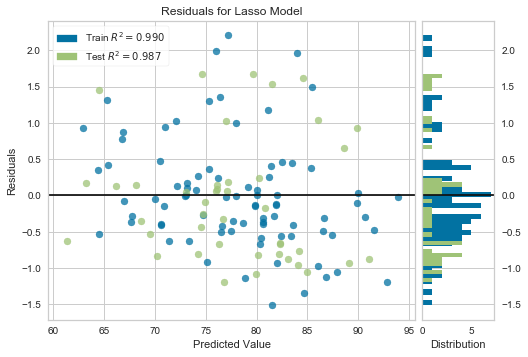

In [53]:
visualizer = ResidualsPlot(lasso)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

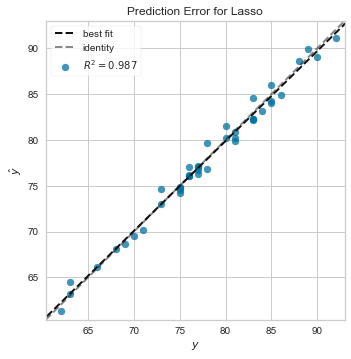

In [54]:
from yellowbrick.regressor import PredictionError

visualizer = PredictionError(lasso)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

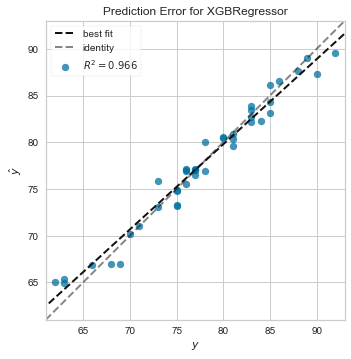

In [55]:
visualizer = PredictionError(xg_reg)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()